## 1 - Introduction: Predicting Used Car Prices¶

**Context**: In the highly competitive used car market, pricing accuracy is critical. Overpricing may result in unsold inventory, while underpricing could lead to reduced profit margins. The ability to predict the correct price for a used car based on its attributes can significantly impact a business's bottom line.

**Objective**: The objective of this competition is to develop a machine learning model that accurately predicts the price of used cars based on various attributes, such as make, model, year, mileage, condition, and other relevant features. Accurate price predictions will help car dealers, individual sellers, and online marketplaces optimize pricing strategies, leading to better sales performance and customer satisfaction.

**Evaluation Metric**: The model's performance will be evaluated using the Root Mean Squared Error (RMSE). This metric measures the average magnitude of errors between the predicted and actual car prices, giving higher penalties to larger errors. A lower RMSE indicates a more accurate model.

**Impact**: An effective pricing model will allow stakeholders to set competitive prices that attract buyers while maximizing profit margins. It will also help buyers make informed purchasing decisions by providing fair market value estimates.

**Conclusion**: By leveraging the power of machine learning, this competition aims to enhance the accuracy of used car price predictions, benefiting both sellers and buyers in the used car market.

In [78]:
# Import library
# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt


# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import gc

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())



Python version in this Jupyter Notebook: 3.10.14


## 2 - Load Data

In [79]:
# Database
df = pd.read_csv("/kaggle/input/germany-used-cars-dataset-2023/data.csv")

# Viewing dataset
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [80]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251079 entries, 0 to 251078
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                251079 non-null  int64  
 1   brand                     251079 non-null  object 
 2   model                     251079 non-null  object 
 3   color                     250913 non-null  object 
 4   registration_date         251075 non-null  object 
 5   year                      251079 non-null  object 
 6   price_in_euro             251079 non-null  object 
 7   power_kw                  250945 non-null  object 
 8   power_ps                  250950 non-null  object 
 9   transmission_type         251079 non-null  object 
 10  fuel_type                 251079 non-null  object 
 11  fuel_consumption_l_100km  224206 non-null  object 
 12  fuel_consumption_g_km     251079 non-null  object 
 13  mileage_in_km             250927 non-null  f

In [81]:
# Type of data
df.dtypes

Unnamed: 0                    int64
brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro                object
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
offer_description            object
dtype: object

In [82]:
# Viewing rows and columns
df.shape

(251079, 15)

## 3 - Data Cleaning

In [83]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
Unnamed: 0                      0
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26873
fuel_consumption_g_km           0
mileage_in_km                 152
offer_description               1
dtype: int64


In [84]:
# Checking the number of null values ​​in specific columns
print(df[['color', 'power_kw', 'power_ps','fuel_consumption_l_100km','mileage_in_km']].isnull().sum())

color                         166
power_kw                      134
power_ps                      129
fuel_consumption_l_100km    26873
mileage_in_km                 152
dtype: int64


In [85]:
# Drop 'Unnamed Column' column
df = df.drop(['Unnamed: 0','offer_description'], axis=1)
df

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0
251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0
251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0
251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0


The fuel consumption columns are strings which can be converted to integer by removing the "l/100 km" and "g/km".

In [86]:
def clean_columns(df, columns):
    """
    Clean specified columns in a dataframe by removing non-numeric characters
    and converting to appropriate numeric types (float or int).

    Parameters:
    df (pd.DataFrame): The dataframe containing the columns to clean.
    columns (list): A list of column names to clean.

    Returns:
    pd.DataFrame: The dataframe with cleaned columns.
    """
    for col in columns:
        # Check if the column contains commas (indicating float-like numbers)
        if df[col].str.contains(',').any():
            df[col] = df[col].str.replace(r'[^0-9,]', '', regex=True)  # Remove non-numeric characters except commas
            df[col] = df[col].str.replace(',', '.').replace('', np.nan)  # Replace empty strings with NaN
            df[col] = df[col].astype(float)
        else:
            df[col] = df[col].str.replace(r'[^0-9]', '', regex=True).replace('', np.nan)  # Replace empty strings with NaN
            df[col] = df[col].astype(float)  # Convert to float or int as necessary
    
    return df

In [87]:
df = clean_columns(df, ['fuel_consumption_l_100km', 'fuel_consumption_g_km'])

In [88]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    26922
fuel_consumption_g_km       36770
mileage_in_km                 152
dtype: int64


In [89]:
# Viewing rows and columns
df.shape

(251079, 13)

We have lot of missing value in the *fuel_consumption_l_100km* and *fuel_consumption_g_km* after removing the string part from these columns. The fuel_consumption_g_km is a CO₂ emissions (g/km), The column "fuel_consumption_l_100km" value can be calculated using the value from "fuel_consumption_g_km" and by using the type of fuel used in the vehicle which gives the Co2 Factor.

Here is the formula to calculate "*fuel_consumption_l_100km*" and "*fuel_consumption_g_km*".



$ \text{Fuel consumption (g/km)} = \left( \frac{ \text{Fuel consumption (l/100 km)} \times \text{Fuel-specific CO₂ factor (g/l)} }{100} \right)$


$\text{Fuel consumption (l/100 km)} = \left( \frac{ \text{Fuel consumption (g/km)} \times 100 }{ \text{Fuel-specific CO₂ factor (g/l)} } \right)$


In [90]:
# CO2 factors for various fuel types as a constant
CO2_FACTORS = {
    'Petrol': 2350,        # g/l for petrol
    'Diesel': 2640,        # g/l for diesel
    'LPG': 1500,           # Approximate value for LPG
    'CNG': 1200,           # Approximate value for CNG
    'Electric': 0,         # Electric vehicles typically have no emissions
    'Hydrogen': 0          # Hydrogen vehicles typically have no emissions
}

# Function to calculate fuel consumption l/100 km from g/km
def calculate_fuel_consumption_l_100km(row):
    co2_emissions_g_per_km = row['fuel_consumption_g_km']
    fuel_type = row['fuel_type']
    co2_factor = CO2_FACTORS.get(fuel_type, np.nan)
    
    # Check for valid CO2 factor
    if co2_factor is None or co2_factor == 0:
        return 0  # Return 0 for electric or hydrogen vehicles
    
    return (co2_emissions_g_per_km * 100) / co2_factor

# Function to calculate CO₂ emissions g/km from fuel consumption l/100 km
def calculate_fuel_consumption_g_km(row):
    fuel_consumption_l_100km = row['fuel_consumption_l_100km']
    fuel_type = row['fuel_type']
    co2_factor = CO2_FACTORS.get(fuel_type, np.nan)
    
    # Check for valid CO2 factor and fuel consumption
    if co2_factor is None or co2_factor == 0 or fuel_consumption_l_100km is None:
        return np.nan  # Return NaN if the values are not valid
    
    return (fuel_consumption_l_100km * co2_factor) / 100


# Calculate fuel consumption for missing values using apply
df['fuel_consumption_l_100km'] = df.apply(
    lambda row: calculate_fuel_consumption_l_100km(row) if np.isnan(row['fuel_consumption_l_100km']) else row['fuel_consumption_l_100km'],
    axis=1
)

df['fuel_consumption_g_km'] = df.apply(
    lambda row: calculate_fuel_consumption_g_km(row) if np.isnan(row['fuel_consumption_g_km']) else row['fuel_consumption_g_km'],
    axis=1
)

In [91]:
# Viewing rows and columns
df.shape

(251079, 13)

In [92]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,10.91,260.000,160500.0
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,NaN,190000.0
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,NaN,129000.0
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,9.51,225.000,189500.0
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,7.21,169.435,96127.0


In [93]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
brand                           0
model                           0
color                         166
registration_date               4
year                            0
price_in_euro                   0
power_kw                      134
power_ps                      129
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    15694
fuel_consumption_g_km       14511
mileage_in_km                 152
dtype: int64


We were able to fill up around 50% of missing values in the *fuel_consumption_l_100km* and the *fuel_consumption_g_km* using the above technique. We can remove the remaining rows with NA value as there is no other way to fill it up.

In [94]:
import pandas as pd

def remove_outliers(df, columns, min_rows=10):
    """
    Removes outliers from the specified numeric columns using the IQR method,
    ensuring that at least `min_rows` remain in the DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame from which outliers will be removed.
    columns (list): A list of column names where outliers should be removed.
    min_rows (int): The minimum number of rows that should remain in the DataFrame 
                    after removing outliers. Default is 10.
    
    Returns:
    DataFrame: A DataFrame with outliers removed from the specified columns.
    """
    
    # Create a mask for filtering outliers across all specified columns
    mask = pd.Series(True, index=df.index)
    
    for col in columns:
        # Attempt to convert the column to numeric, ignoring errors
        df[col] = pd.to_numeric(df[col], errors='coerce')
        
        # Fill NaN values with the median of the column
        df[col].fillna(df[col].median(), inplace=True)
        
        # Calculate the first and third quartiles and the interquartile range (IQR)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update mask to keep only non-outlier rows for this column
        mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)
        
    # Apply mask only if it leaves at least `min_rows` in the DataFrame
    if mask.sum() >= min_rows:
        df = df[mask]
    else:
        print(f"Unable to apply outlier filter without removing all rows.")
    
    return df

# Applying the function to the DataFrame
numeric_columns = ['price_in_euro', 'power_kw', 'power_ps', 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km']
df = remove_outliers(df, numeric_columns)

# Display the head of the cleaned DataFrame
print(df.head())


        brand              model  color registration_date  year  \
1  alfa-romeo     Alfa Romeo 164  black           02/1995  1995   
2  alfa-romeo  Alfa Romeo Spider  black           02/1995  1995   
3  alfa-romeo  Alfa Romeo Spider  black           07/1995  1995   
4  alfa-romeo     Alfa Romeo 164    red           11/1996  1996   
5  alfa-romeo  Alfa Romeo Spider    red           04/1996  1996   

   price_in_euro  power_kw  power_ps transmission_type fuel_type  \
1        24900.0     191.0     260.0            Manual    Petrol   
2         5900.0     110.0     150.0           Unknown    Petrol   
3         4900.0     110.0     150.0            Manual    Petrol   
4        17950.0     132.0     179.0            Manual    Petrol   
5         7900.0     110.0     150.0            Manual    Petrol   

   fuel_consumption_l_100km  fuel_consumption_g_km  mileage_in_km  
1                      5.81                137.000       190000.0  
2                      5.81                137.000  

In [95]:
# Viewing rows and columns
df.shape

(184734, 13)

In [96]:
# Viewing rows and columns
df.shape

(184734, 13)

In [97]:
def drop_missing(df, columns):
    """Remove rows that contain missing values in the specified columns."""
    
    df = df.dropna(subset=columns)
    
    return df

# Applying the function to train_df
columns_to_check = ['color', 'registration_date', 'power_kw', 'power_ps', 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km']

df = drop_missing(df, columns_to_check)

In [98]:
print("Checking for missing values in each column:")
print(df.isnull().sum())

Checking for missing values in each column:
brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
dtype: int64


In [99]:
# Viewing rows and columns
df.shape

(184610, 13)

## 4 - Exploratory Data Analysis

### Feature Types

In [100]:
categorical_features = df.select_dtypes(include='object').columns.tolist()

numerical_features = df.select_dtypes(exclude='object').columns.tolist()

for feature in ['price', 'id']:
    if feature in numerical_features:
        numerical_features.remove(feature)

# Create DataFrames for continuous and categorical variables

df_numerical = pd.DataFrame({'Numerical Variables': numerical_features})
df_categorical = pd.DataFrame({'Categorical Variables': categorical_features})

df_numerical

,Numerical Variables
0,price_in_euro
1,power_kw
2,power_ps
3,fuel_consumption_l_100km
4,fuel_consumption_g_km
5,mileage_in_km


In [101]:
df_categorical

,Categorical Variables
0,brand
1,model
2,color
3,registration_date
4,year
5,transmission_type
6,fuel_type


### Vehicle's Price Trends

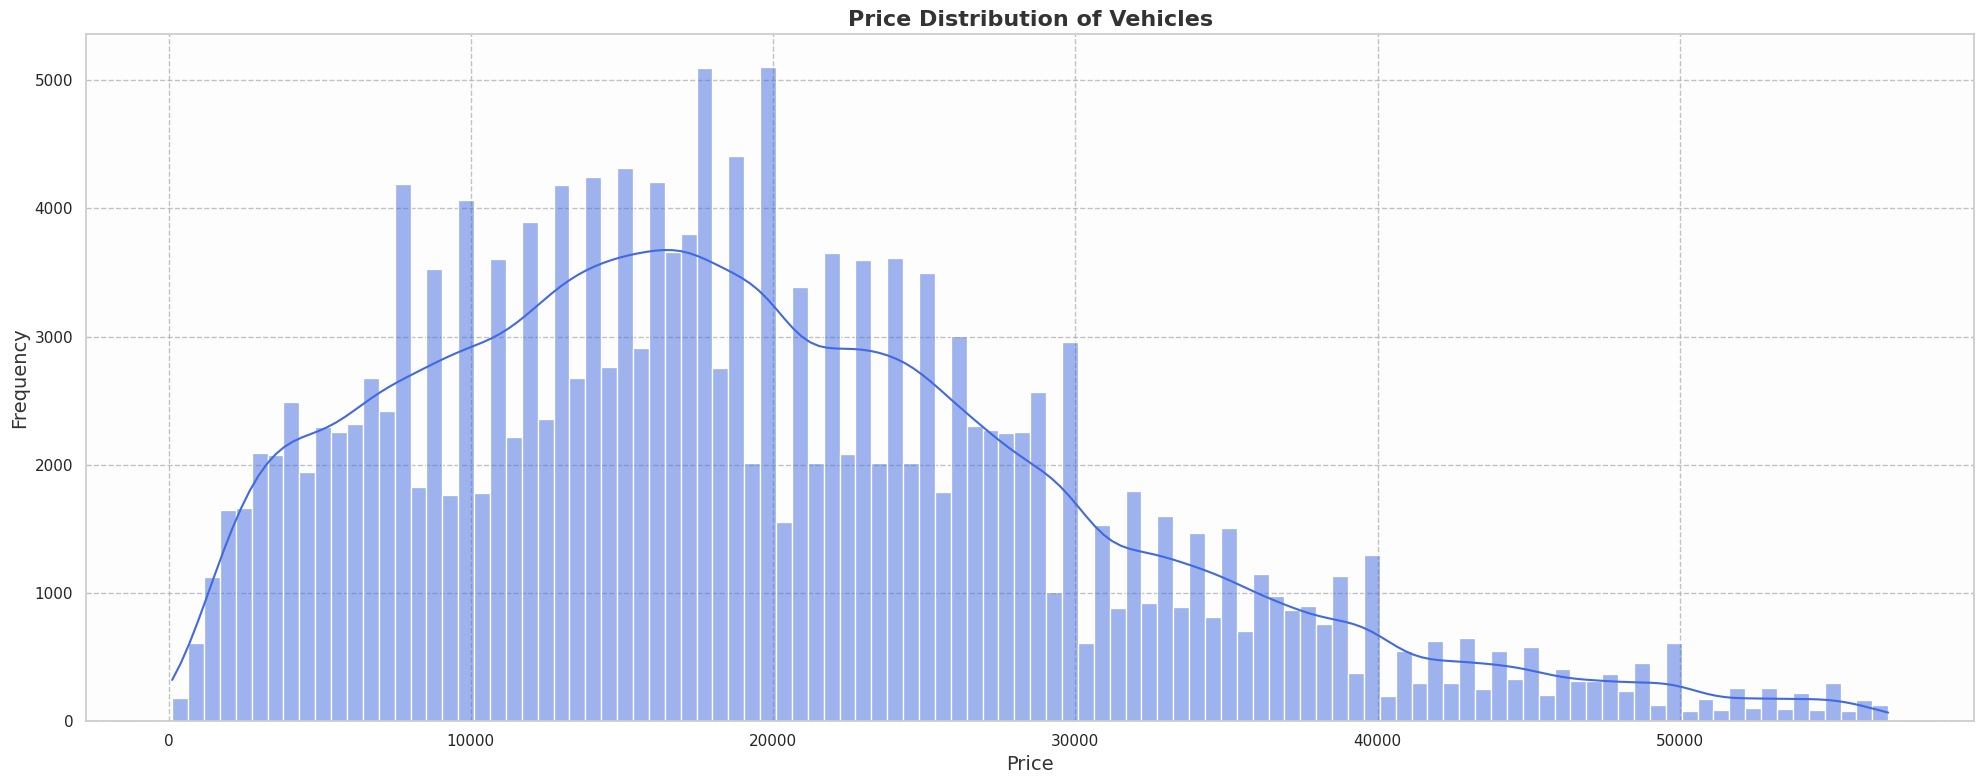

In [102]:
# Set up the figure
plt.figure(figsize=(20, 8))

# Define custom colors
hist_color = '#4169E1'  # Royal Blue for histogram
background_color = '#F5F5F5'  # Light Gray background
grid_color = '#A9A9A9'  # Dark Gray for grid lines
text_color = '#333333'  # Dark Gray for text

# Set the style for the plot
sns.set(style="whitegrid")

# Histogram
sns.histplot(df['price_in_euro'], kde=True, color=hist_color)
plt.title('Price Distribution of Vehicles', fontsize=16, fontweight='bold', color=text_color)
plt.xlabel('Price', fontsize=14, color=text_color)
plt.ylabel('Frequency', fontsize=14, color=text_color)
plt.gca().patch.set_facecolor(background_color)  # Set background color
plt.gca().patch.set_alpha(0.1)  # Set transparency for the patch
plt.grid(True, linestyle='--', alpha=0.7, color=grid_color)  # Set grid lines

# Adjust layout
plt.tight_layout()
plt.show()

### Fuel type distribution

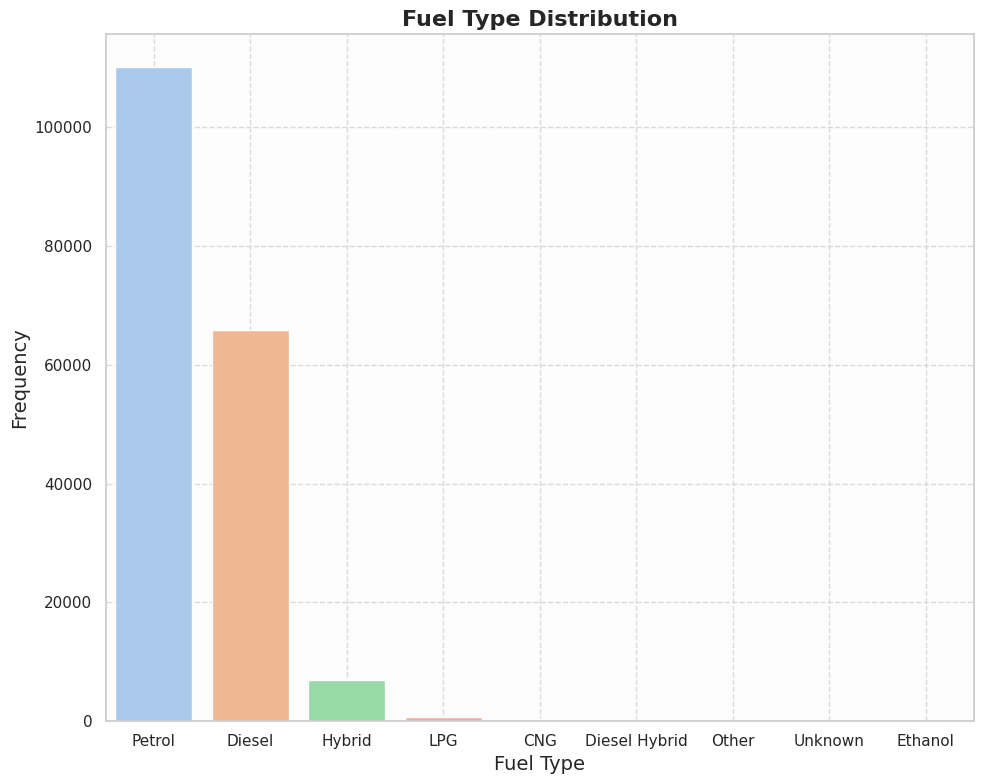

In [103]:
# Set a general aesthetic style for the plots
sns.set(style="whitegrid")

# Create a figure object
plt.figure(figsize=(10, 8))  # Adjust size if needed

# Define a custom color palette for fuel types
color_palette = sns.color_palette("pastel")

# Histogram for Fuel Type
sns.countplot(data=df, x='fuel_type', order=df['fuel_type'].value_counts().index, palette=color_palette)

# Set titles and labels
plt.title('Fuel Type Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set background color
plt.gca().patch.set_facecolor('#F5F5F5')  # Light Gray background
plt.gca().patch.set_alpha(0.1)  # Adjust alpha for transparency

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

### Transmission Type of the car

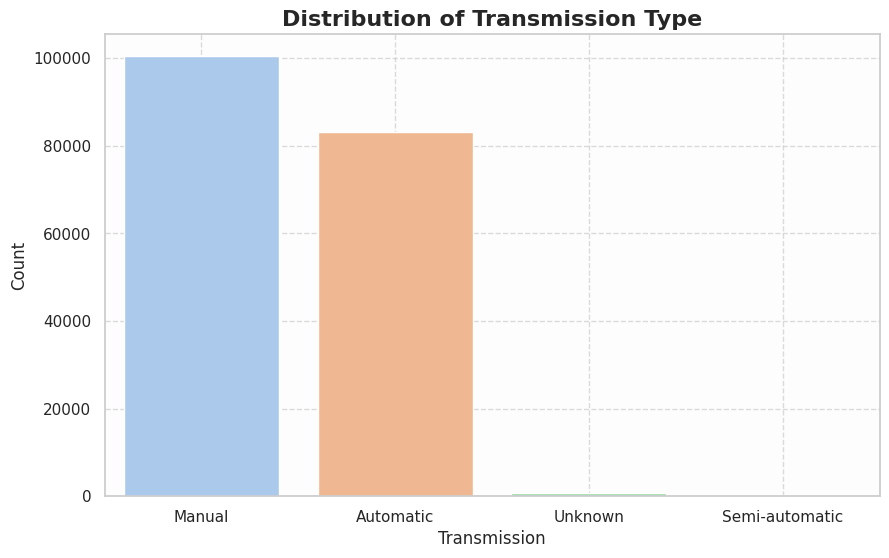

In [104]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission_type', data=df,order=df['transmission_type'].value_counts().index, palette = color_palette)
plt.title('Distribution of Transmission Type', fontsize=16, fontweight='bold')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.gca().patch.set_facecolor('#F5F5F5')  # Light Gray background
plt.gca().patch.set_alpha(0.1)  # Adjust alpha for transparency

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Distribution of Car Brands

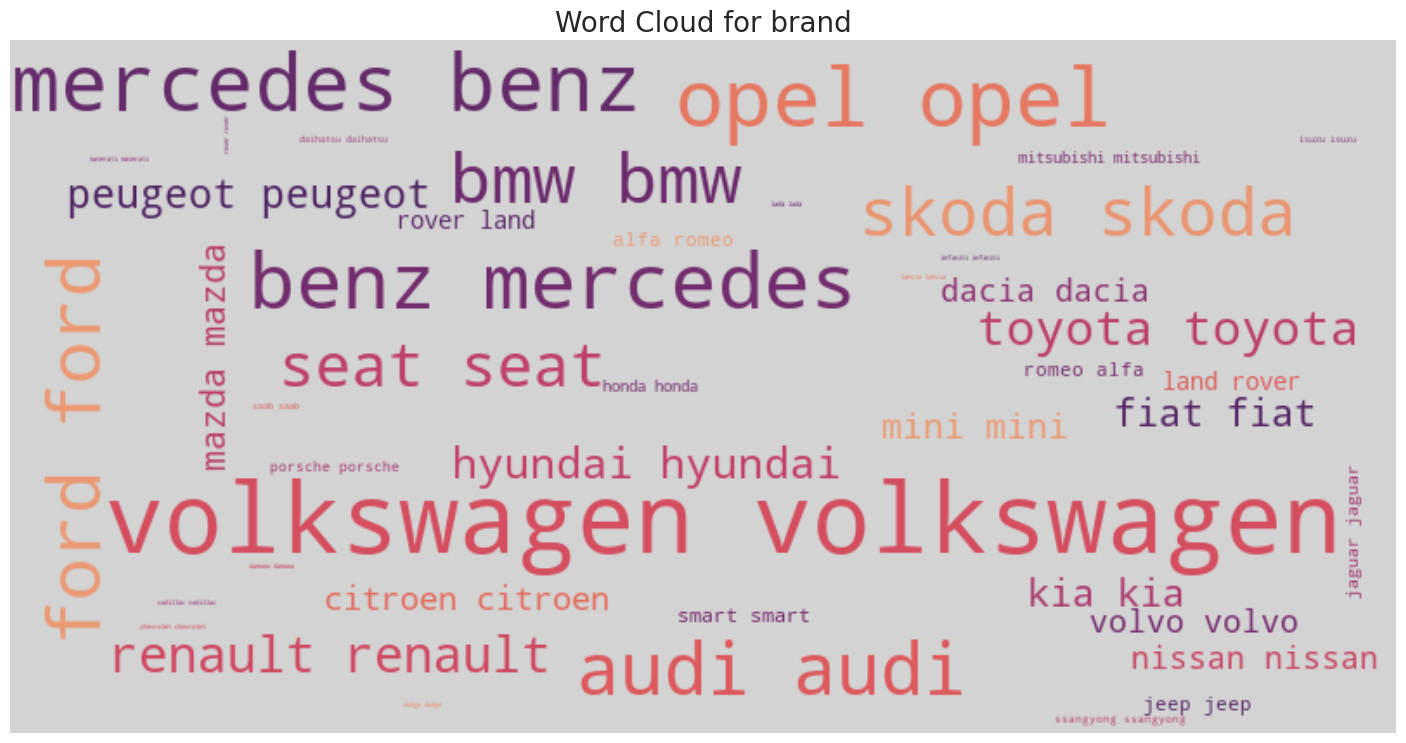

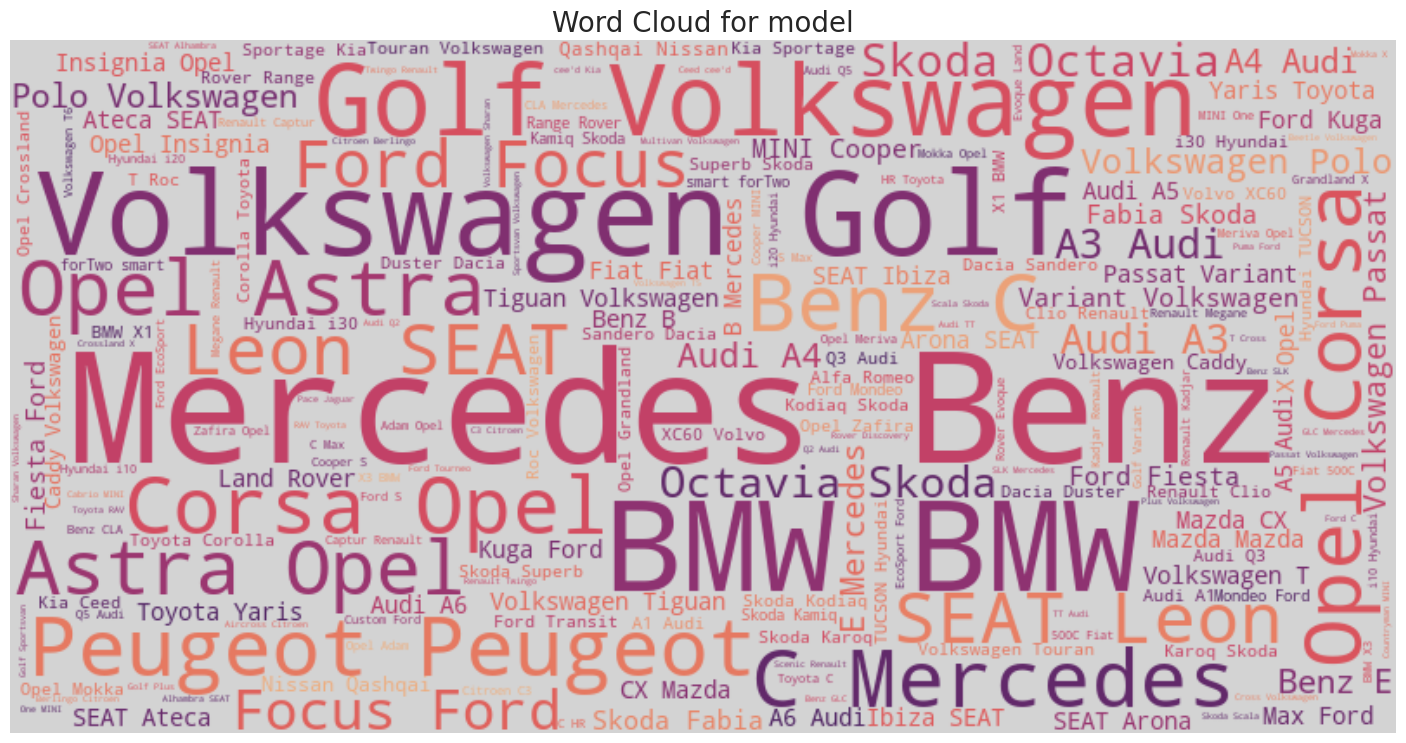

In [105]:
from wordcloud import WordCloud

cat_features_word = ['brand', 'model']
palettes = 'flare'

for feature in cat_features_word:
    text = ' '.join(df[feature].astype(str).values)
    
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='lightgray',
        colormap = palettes).generate(text)
    
    plt.figure(figsize=(20, 9))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {feature}', fontsize=20)
    plt.subplots_adjust(hspace=3) 
    plt.show()

### Distribution of Car Colors 

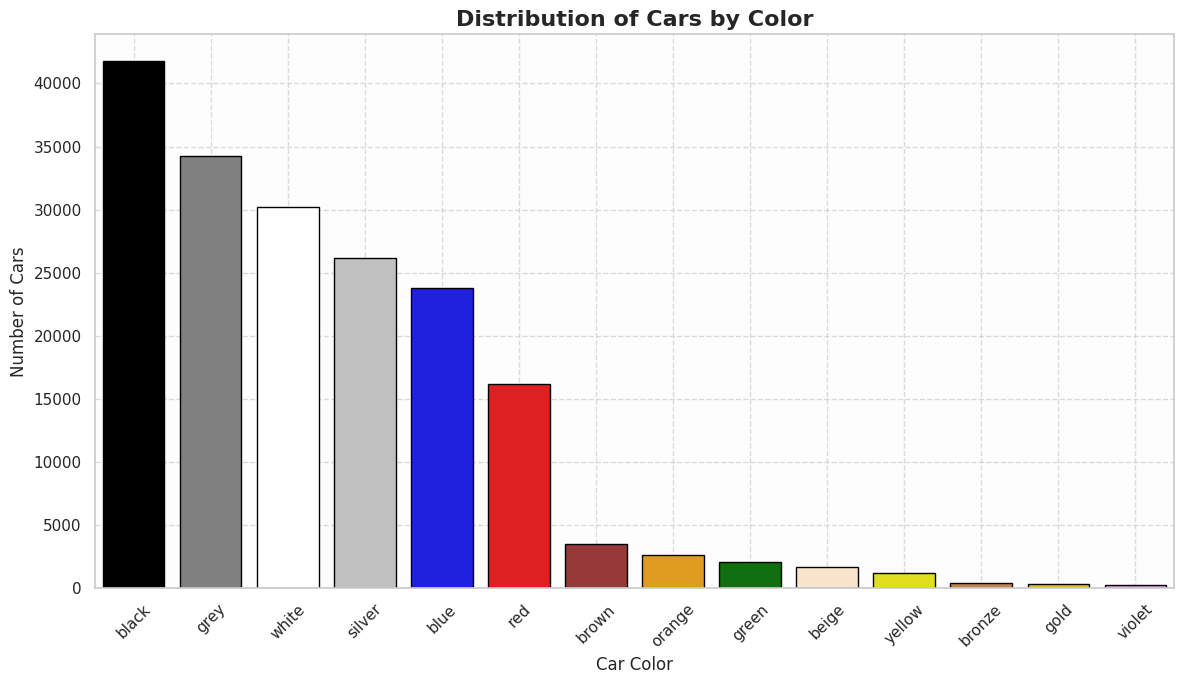

In [106]:
# Create a custom palette that matches the car colors to valid Matplotlib color names
color_palette = {
    'black': 'black',
    'grey': 'grey',
    'white': 'white',  # White will be visible with an outline
    'silver': 'silver',
    'blue': 'blue',
    'red': 'red',
    'brown': 'brown',
    'orange': 'orange',
    'green': 'green',
    'beige': 'bisque',  # Replacing beige with a close color
    'yellow': 'yellow',
    'bronze': 'peru',   # Replacing bronze with a close color (peru)
    'gold': 'gold',
    'violet': 'violet'
}

# Generate the color palette based on the unique values in the 'color' column
sorted_colors = df['color'].value_counts().index
palette = {color: color_palette.get(color, 'grey') for color in sorted_colors}

# Plot the bar chart with the custom palette
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))  # Adjusted size for better readability
bars = sns.countplot(x='color', data=df, order=sorted_colors, palette=palette, edgecolor='black')  # Add edgecolor

# Title and labels
plt.title('Distribution of Cars by Color', fontsize=16, fontweight='bold')
plt.xlabel('Car Color', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)

plt.gca().patch.set_facecolor('#F5F5F5')  # Light Gray background
plt.gca().patch.set_alpha(0.1)  # Adjust alpha for transparency

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)
# Adjust x-ticks
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


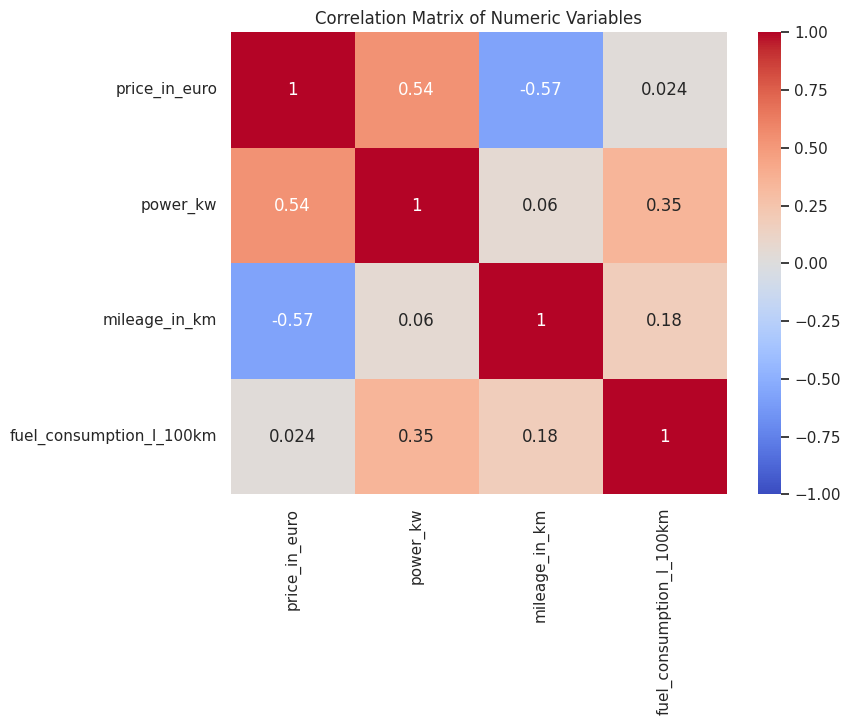

In [107]:
numeric_cols = ['price_in_euro', 'power_kw', 'mileage_in_km', 'fuel_consumption_l_100km']

# Calculate pairwise correlation
correlation_matrix = df[numeric_cols].corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

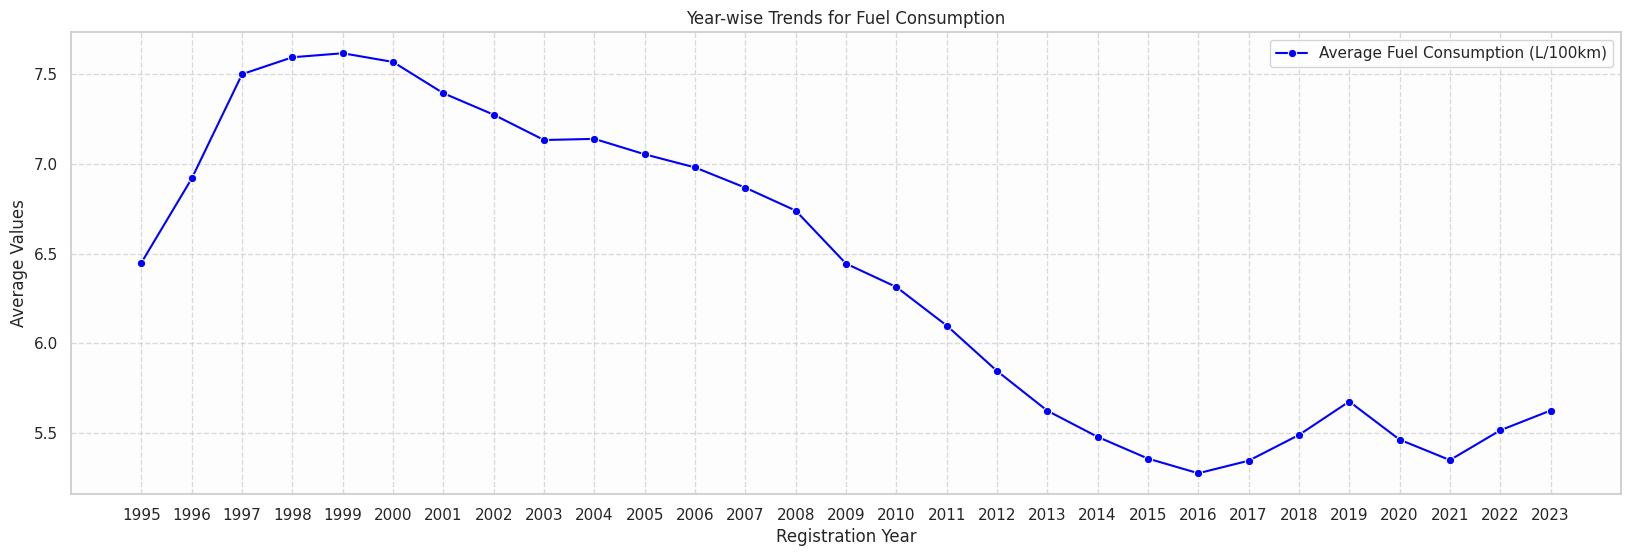

In [108]:
yearly_data = df.groupby('year').agg({
    'price_in_euro': 'mean',
    'power_kw': 'mean',
    'fuel_consumption_l_100km': 'mean'
}).reset_index()

# Plotting the trends over time
plt.figure(figsize=(20, 6))

# Line plot for fuel consumption trend over time
sns.lineplot(x='year', y='fuel_consumption_l_100km', data=yearly_data, label='Average Fuel Consumption (L/100km)', marker='o',color='blue')

# Customizing the plot
plt.title('Year-wise Trends for Fuel Consumption')
plt.xlabel('Registration Year')
plt.ylabel('Average Values')
plt.gca().patch.set_facecolor('#F5F5F5')  # Light Gray background
plt.gca().patch.set_alpha(0.1)  # Adjust alpha for transparency

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

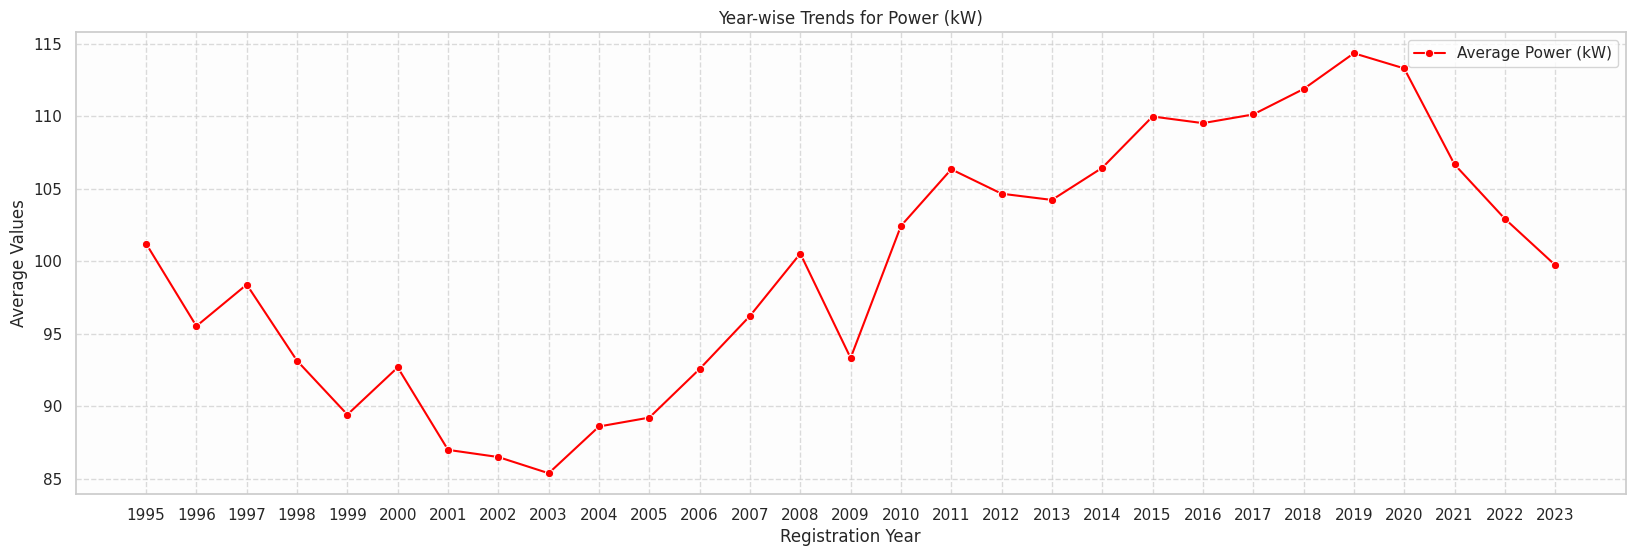

In [109]:
# Plotting the trends over time
plt.figure(figsize=(20, 6))


# # Line plot for power trend over time
sns.lineplot(x='year', y='power_kw', data=yearly_data, label='Average Power (kW)', marker='o', color='red')

# Customizing the plot
plt.title('Year-wise Trends for Power (kW)')
plt.xlabel('Registration Year')
plt.ylabel('Average Values')
plt.gca().patch.set_facecolor('#F5F5F5')  # Light Gray background
plt.gca().patch.set_alpha(0.1)  # Adjust alpha for transparency

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

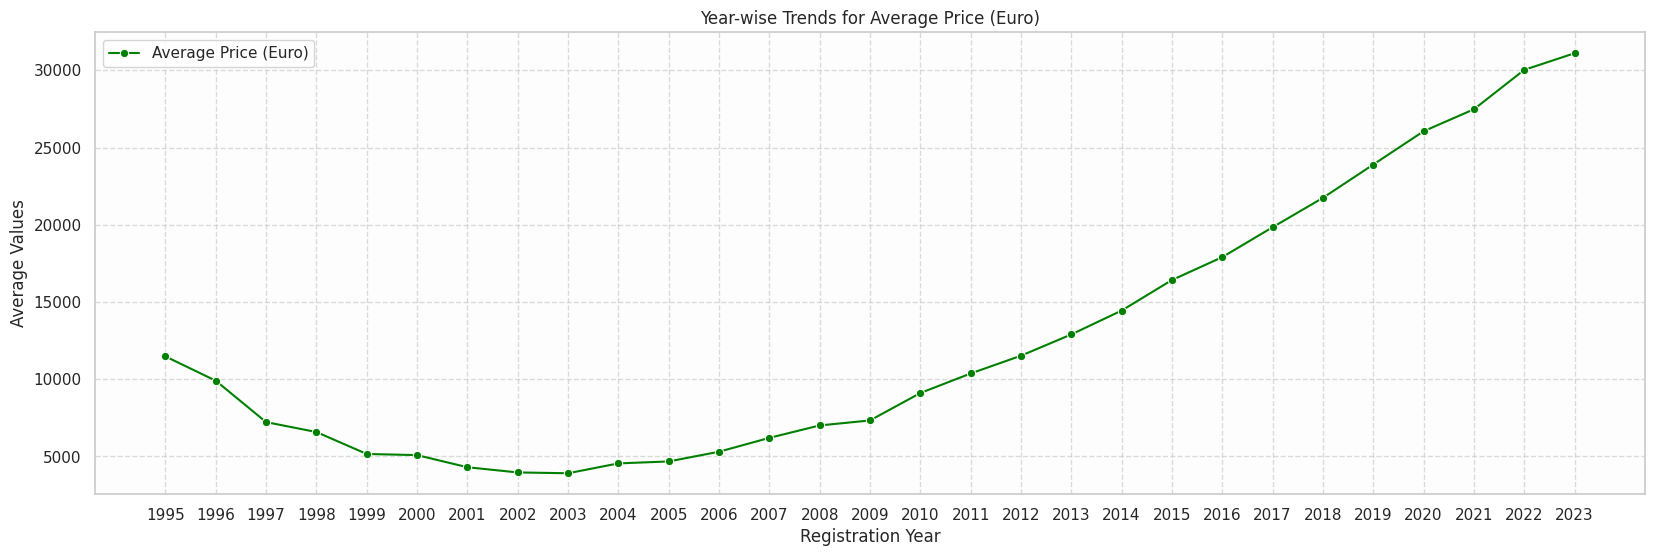

In [110]:
# Plotting the trends over time
plt.figure(figsize=(20, 6))

# Line plot for price trend over time
sns.lineplot(x='year', y='price_in_euro', data=yearly_data, label='Average Price (Euro)', marker='o',color='green')


# Customizing the plot
plt.title('Year-wise Trends for Average Price (Euro)')
plt.xlabel('Registration Year')
plt.ylabel('Average Values')
plt.gca().patch.set_facecolor('#F5F5F5')  # Light Gray background
plt.gca().patch.set_alpha(0.1)  # Adjust alpha for transparency

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

## Fuel Type Vs Fuel Efficency

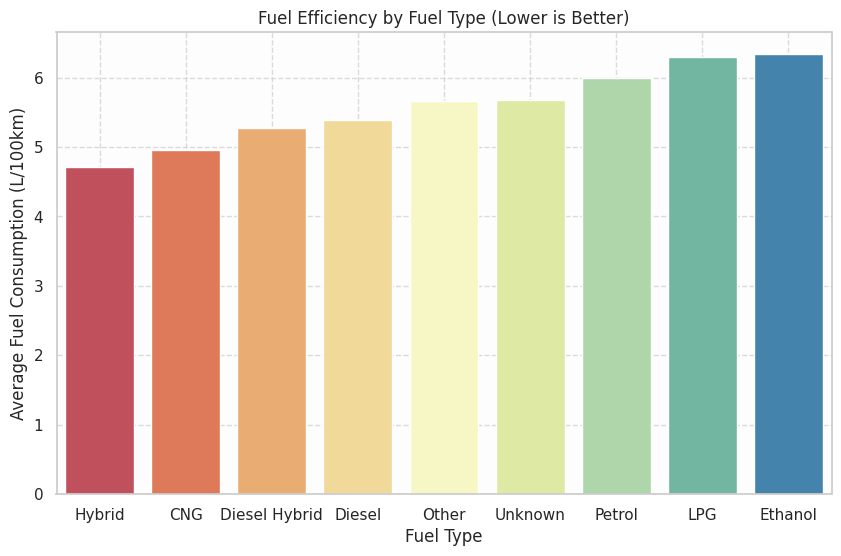

In [111]:

# Group by fuel_type to calculate the average fuel consumption
fuel_efficiency = df.groupby('fuel_type')['fuel_consumption_l_100km'].mean().reset_index()

# Sort by fuel consumption for better visualization
fuel_efficiency = fuel_efficiency.sort_values(by='fuel_consumption_l_100km')

# Plotting fuel efficiency by fuel type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='fuel_consumption_l_100km', data=fuel_efficiency, palette='Spectral')
plt.title('Fuel Efficiency by Fuel Type (Lower is Better)')
plt.xlabel('Fuel Type')
plt.ylabel('Average Fuel Consumption (L/100km)')
plt.gca().patch.set_facecolor('#F5F5F5')  # Light Gray background
plt.gca().patch.set_alpha(0.1)  # Adjust alpha for transparency

# Customize grid lines
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### 5 - Feature Engineering

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184610 entries, 1 to 251073
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     184610 non-null  object 
 1   model                     184610 non-null  object 
 2   color                     184610 non-null  object 
 3   registration_date         184610 non-null  object 
 4   year                      184610 non-null  object 
 5   price_in_euro             184610 non-null  float64
 6   power_kw                  184610 non-null  float64
 7   power_ps                  184610 non-null  float64
 8   transmission_type         184610 non-null  object 
 9   fuel_type                 184610 non-null  object 
 10  fuel_consumption_l_100km  184610 non-null  float64
 11  fuel_consumption_g_km     184610 non-null  float64
 12  mileage_in_km             184610 non-null  float64
dtypes: float64(6), object(7)
memory usage: 19.7+ MB


In [113]:
df['year'] = df['year'].astype(int)

# Importing library
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=df.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
df[label_col]=df[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Viewing
Label_pre

In [114]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191.0,260.0,Manual,Petrol,5.81,137.000,190000.0
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110.0,150.0,Unknown,Petrol,5.81,137.000,129000.0
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110.0,150.0,Manual,Petrol,9.51,225.000,189500.0
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132.0,179.0,Manual,Petrol,7.21,169.435,96127.0
5,alfa-romeo,Alfa Romeo Spider,red,04/1996,1996,7900.0,110.0,150.0,Manual,Petrol,9.51,225.000,47307.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184610 entries, 1 to 251073
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     184610 non-null  object 
 1   model                     184610 non-null  object 
 2   color                     184610 non-null  object 
 3   registration_date         184610 non-null  object 
 4   year                      184610 non-null  int64  
 5   price_in_euro             184610 non-null  float64
 6   power_kw                  184610 non-null  float64
 7   power_ps                  184610 non-null  float64
 8   transmission_type         184610 non-null  object 
 9   fuel_type                 184610 non-null  object 
 10  fuel_consumption_l_100km  184610 non-null  float64
 11  fuel_consumption_g_km     184610 non-null  float64
 12  mileage_in_km             184610 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 

As we also have the year column which provide the information about car model's year. We can drop the 'registration_date' . 

In [116]:
df = df.drop(['registration_date'], axis=1)

In [117]:
df.head()

,brand,model,color,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
1,alfa-romeo,Alfa Romeo 164,black,1995,24900.0,191.0,260.0,Manual,Petrol,5.81,137.000,190000.0
2,alfa-romeo,Alfa Romeo Spider,black,1995,5900.0,110.0,150.0,Unknown,Petrol,5.81,137.000,129000.0
3,alfa-romeo,Alfa Romeo Spider,black,1995,4900.0,110.0,150.0,Manual,Petrol,9.51,225.000,189500.0
4,alfa-romeo,Alfa Romeo 164,red,1996,17950.0,132.0,179.0,Manual,Petrol,7.21,169.435,96127.0
5,alfa-romeo,Alfa Romeo Spider,red,1996,7900.0,110.0,150.0,Manual,Petrol,9.51,225.000,47307.0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184610 entries, 1 to 251073
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     184610 non-null  object 
 1   model                     184610 non-null  object 
 2   color                     184610 non-null  object 
 3   year                      184610 non-null  int64  
 4   price_in_euro             184610 non-null  float64
 5   power_kw                  184610 non-null  float64
 6   power_ps                  184610 non-null  float64
 7   transmission_type         184610 non-null  object 
 8   fuel_type                 184610 non-null  object 
 9   fuel_consumption_l_100km  184610 non-null  float64
 10  fuel_consumption_g_km     184610 non-null  float64
 11  mileage_in_km             184610 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 18.3+ MB


# Importing library
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=df.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
df[label_col]=df[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Viewing
Label_pre

In [141]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

encoder = ce.BinaryEncoder(cols=['brand', 'model', 'color', 'transmission_type', 'fuel_type'])
df_encoded = encoder.fit_transform(df)


scaler = StandardScaler()
numeric_cols = ['year', 'power_kw', 'power_ps', 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

### 6 -  Training and testing data division

In [143]:
df_encoded.head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,model_0,model_1,model_2,model_3,...,transmission_type_0,transmission_type_1,transmission_type_2,fuel_type_0,fuel_type_1,fuel_type_2,fuel_type_3,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0.076244,-0.046565,1.570205
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0.076244,-0.046565,0.661128
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,3.257795,3.041359,1.562754
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1.280074,1.091581,0.171225
5,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,3.257795,3.041359,-0.556334


In [169]:
# Selecting variables for model
X = df_encoded.drop('price_in_euro', axis=1)
y = df_encoded['price_in_euro']

In [170]:
X.shape

(184610, 33)

In [171]:
X.columns

Index(['brand_0', 'brand_1', 'brand_2', 'brand_3', 'brand_4', 'brand_5',
       'model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5',
       'model_6', 'model_7', 'model_8', 'model_9', 'color_0', 'color_1',
       'color_2', 'color_3', 'year', 'power_kw', 'power_ps',
       'transmission_type_0', 'transmission_type_1', 'transmission_type_2',
       'fuel_type_0', 'fuel_type_1', 'fuel_type_2', 'fuel_type_3',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km'],
      dtype='object')

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import gc

### 7 -  Model training

In [173]:
# Importing libraries
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
# Viewing X_train rows and columns
print("Viewing X train data:", X_train.shape)

# Viewing y_train rows and columns
print("Viewing y train data:", y_train.shape)

Viewing X train data: (147688, 33)
Viewing y train data: (147688,)


In [175]:
X_train.head()

,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,model_0,model_1,model_2,model_3,...,transmission_type_0,transmission_type_1,transmission_type_2,fuel_type_0,fuel_type_1,fuel_type_2,fuel_type_3,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
62940,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,0,0,1,-0.783635,-0.993996,0.756924
3767,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1.366062,1.953568,1.823554
208988,1,0,1,0,0,0,1,1,0,0,...,0,1,1,0,0,1,1,-1.127586,-1.344896,-0.528123
37463,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,-0.353696,0.023615,0.203416
213705,1,0,1,0,0,1,1,1,0,1,...,0,0,1,0,0,0,1,0.076244,-0.046565,1.048604


### 7.1 - Base Models

In [176]:
import xgboost as xgb
import lightgbm as lgb
from lightgbm import log_evaluation
from catboost import CatBoostRegressor
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

# Initializing and training the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)], 
              early_stopping_rounds=10, 
              verbose=True)

# Making predictions with the trained XGBoost model
xgb_model_pred = xgb_model.predict(X_test)

# Initializing and training the LightGBM model
lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(X_train, y_train,
               eval_set=[(X_test, y_test)],  
               callbacks=[log_evaluation(10)])

# Making predictions with the trained LightGBM model
lgbm_predictions = lgbm_model.predict(X_test)

# Initializing and training the CatBoost model
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train, 
                   eval_set=(X_test, y_test), 
                   early_stopping_rounds=10)

# Making predictions with the trained CatBoost model
catboost_predictions = catboost_model.predict(X_test)

# Calculating RMSE for the models
lgbm_rmse = sqrt(mean_squared_error(y_test, lgbm_predictions))
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_model_pred))
catboost_rmse = sqrt(mean_squared_error(y_test, catboost_predictions))

print(f"Base LightGBM RMSE: {lgbm_rmse:.4f}")
print(f"Base XGBoost RMSE: {xgb_rmse:.4f}")
print(f"Base CatBoost RMSE: {catboost_rmse:.4f}")

[0]	validation_0-rmse:8706.41349
[1]	validation_0-rmse:7071.75508
[2]	validation_0-rmse:6013.57562
[3]	validation_0-rmse:5360.81588
[4]	validation_0-rmse:4920.82588
[5]	validation_0-rmse:4620.89553
[6]	validation_0-rmse:4434.16351
[7]	validation_0-rmse:4315.20808
[8]	validation_0-rmse:4197.28975
[9]	validation_0-rmse:4123.41376
[10]	validation_0-rmse:4060.11484
[11]	validation_0-rmse:4030.00778
[12]	validation_0-rmse:4001.70474
[13]	validation_0-rmse:3975.21847
[14]	validation_0-rmse:3947.33757
[15]	validation_0-rmse:3928.30120
[16]	validation_0-rmse:3913.13935
[17]	validation_0-rmse:3907.00471
[18]	validation_0-rmse:3897.78122
[19]	validation_0-rmse:3876.64379
[20]	validation_0-rmse:3869.65306
[21]	validation_0-rmse:3853.96690
[22]	validation_0-rmse:3848.02087
[23]	validation_0-rmse:3838.58053
[24]	validation_0-rmse:3819.96479
[25]	validation_0-rmse:3806.89223
[26]	validation_0-rmse:3796.23678
[27]	validation_0-rmse:3792.30335
[28]	validation_0-rmse:3788.77846
[29]	validation_0-rmse:3

In [177]:
print(f"Base LightGBM RMSE: {lgbm_rmse:.4f}")
print(f"Base XGBoost RMSE: {xgb_rmse:.4f}")
print(f"Base CatBoost RMSE: {catboost_rmse:.4f}")

Base LightGBM RMSE: 3659.4487
Base XGBoost RMSE: 3519.9040
Base CatBoost RMSE: 3447.5232


### 7.2 - Hyper-Parameter tuning

In [ ]:
import optuna
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

# Split the data (replace this with your actual dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to log results
def log_trial_results(trial, model_name, params, train_rmse, val_rmse):
    print(f"Trial: {trial.number}, Model: {model_name}, "
          f"Train RMSE: {train_rmse:.4f}, Val RMSE: {val_rmse:.4f}, "
          f"Params: {params}")

# Define the objective function for XGBoost
def objective_xgb(trial):
    xgb_params = {
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 500, 2500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'early_stopping_rounds': 10
    }
    
    model = xgb.XGBRegressor(**xgb_params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose = 0)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)
    
    train_rmse = sqrt(mean_squared_error(y_train, train_preds))
    val_rmse = sqrt(mean_squared_error(y_test, val_preds))

#     log_trial_results(trial, 'XGBoost', xgb_params, train_rmse, val_rmse)
    return val_rmse

# Define the objective function for LightGBM
def objective_lgb(trial):
    lgbm_params = {
        'boosting_type': 'gbdt',
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'early_stopping_rounds': 10,
        
    }
    
    model = lgb.LGBMRegressor(**lgbm_params, verbosity = -1)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)] )
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)

    train_rmse = sqrt(mean_squared_error(y_train, train_preds))
    val_rmse = sqrt(mean_squared_error(y_test, val_preds))

#     log_trial_results(trial, 'LightGBM', lgbm_params, train_rmse, val_rmse)
    return val_rmse

# Define the objective function for CatBoost
def objective_cat(trial):
    catboost_params = {
        'iterations': trial.suggest_int('iterations', 500, 2500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 3, 15),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.01, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.1, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'loss_function': 'RMSE',
        'task_type': 'GPU',
        'early_stopping_rounds': 10
    }
    
    model = CatBoostRegressor(**catboost_params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test),verbose= False)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)

    train_rmse = sqrt(mean_squared_error(y_train, train_preds))
    val_rmse = sqrt(mean_squared_error(y_test, val_preds))

#     log_trial_results(trial, 'CatBoost', catboost_params, train_rmse, val_rmse)
    return val_rmse

# Run Optuna study for XGBoost
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=150)

# Run Optuna study for LightGBM
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=150)

# Run Optuna study for CatBoost
study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=150)

# Print best hyperparameters for each model
print("Best hyperparameters for XGBoost:", study_xgb.best_params)
print("\n Best hyperparameters for LightGBM:", study_lgb.best_params)
print("\n Best hyperparameters for CatBoost:", study_cat.best_params)


[I 2024-10-10 15:39:24,699] A new study created in memory with name: no-name-c38a901e-d516-44f2-a49d-736839759fac
[I 2024-10-10 15:39:28,851] Trial 0 finished with value: 3280.000993802715 and parameters: {'n_estimators': 1547, 'learning_rate': 0.08447622899880952, 'max_depth': 10, 'subsample': 0.8856783883382622, 'colsample_bytree': 0.5486734139061356, 'reg_alpha': 0.4924139660298818, 'reg_lambda': 0.946725625807006}. Best is trial 0 with value: 3280.000993802715.
[I 2024-10-10 15:39:34,967] Trial 1 finished with value: 3336.919077486393 and parameters: {'n_estimators': 793, 'learning_rate': 0.05146200585048273, 'max_depth': 11, 'subsample': 0.7222541306977793, 'colsample_bytree': 0.9216396233344818, 'reg_alpha': 0.4373886735854625, 'reg_lambda': 0.07109785024622226}. Best is trial 0 with value: 3280.000993802715.
[I 2024-10-10 15:39:39,892] Trial 2 finished with value: 3561.8202190705438 and parameters: {'n_estimators': 1210, 'learning_rate': 0.03016935551917979, 'max_depth': 5, 'sub

### 7.3 - Training with best hyperparameters

In [159]:
import xgboost as xgb
import lightgbm as lgb
from lightgbm import log_evaluation
from catboost import CatBoostRegressor
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

# XGBoost model parameters from the hyperparameter tuning

# 'n_estimators': 1209, 'learning_rate': 0.05707948901496035, 'max_depth': 4, 'subsample': 0.9231699173009168, 'colsample_bytree': 0.9908470846412238, 'reg_alpha': 0.543961468118871, 'reg_lambda': 0.010936483155762455

# Best hyperparameters for XGBoost: {'n_estimators': 2000, 'learning_rate': 0.06817782119821567, 'max_depth': 4, 'subsample': 0.9860696233132292, 'colsample_bytree': 0.9962100420503776, 'reg_alpha': 0.9978664024850508, 'reg_lambda': 0.014340626807175481}

# Best hyperparameters for LightGBM: {'learning_rate': 0.09785821529467015, 'num_leaves': 226, 'max_depth': 10, 'min_child_samples': 28, 'subsample': 0.8174040362072024, 'colsample_bytree': 0.9460119359474278, 'reg_alpha': 0.027308984391629616, 'reg_lambda': 0.8110030719291048}

# Best hyperparameters for CatBoost: {'iterations': 1703, 'learning_rate': 0.03436389427449069, 'depth': 8, 'l2_leaf_reg': 7.208795198501838, 'bagging_temperature': 0.16483491851118917, 'random_strength': 6.736364494682377, 'border_count': 255, 'min_data_in_leaf': 41, 'grow_policy': 'Depthwise'}
                            
xgb_params = {
    'tree_method': 'gpu_hist',              # Use GPU-optimized tree method
    'predictor': 'gpu_predictor',           # Use GPU for prediction
    'objective': 'reg:squarederror',        # Objective function for regression
    'n_estimators': 2000,                   # Number of trees (estimators)
    'learning_rate': 0.06817782119821567,  # Learning rate
    'max_depth': 4,                        # Maximum depth of trees
    'subsample': 0.9860696233132292,        # Ratio of samples for subsampling
    'colsample_bytree': 0.9962100420503776, # Proportion of columns for subsampling
    'reg_alpha': 0.9978664024850508,       # L1 Regularization
    'reg_lambda': 0.014340626807175481,        # L2 Regularization,
}

# LightGBM model parameters from the hyperparameter tuning
lgbm_params = {
    'boosting_type': 'gbdt',             # Type of boosting (Gradient Boosted Decision Trees)
    'objective': 'regression',           # Objective function for regression
    'metric': 'rmse',                    # Evaluation metric: Root Mean Squared Error (RMSE)
    'device': 'gpu',                     # Use GPU for training
    'gpu_platform_id': 0,                # GPU platform ID (set as needed)
    'gpu_device_id': 0,                  # GPU device ID (set as needed)
    'learning_rate': 0.09785821529467015, 
    'num_leaves': 226, 
    'max_depth': 10, 
    'min_child_samples': 28, 
    'subsample': 0.8174040362072024, 
    'colsample_bytree': 0.9460119359474278, 
    'reg_alpha': 0.027308984391629616, 
    'reg_lambda': 0.8110030719291048,
}

# CatBoost model parameters from the hyperparameter tuning
catboost_params = {
    
    'iterations': 1703,                          # Number of boosting iterations
    'learning_rate': 0.03436389427449069,        # Learning rate
    'depth': 8,                                  # Depth of trees  
    'l2_leaf_reg': 7.208795198501838,            # L2 regularization coefficient 
    'bagging_temperature': 0.16483491851118917,  
    'random_strength': 6.736364494682377,        
    'border_count': 255, 
    'min_data_in_leaf': 41, 
    'grow_policy': 'Depthwise',
    'eval_metric': 'RMSE',               # Evaluation metric: Root Mean Squared Error
    'task_type': 'GPU',                  # Use GPU for training
}

xgb.set_config(verbosity=0)

# Initializing and training the XGBoost model
xgb_model_hp = xgb.XGBRegressor(**xgb_params)
xgb_model_hp.fit(X_train, y_train, 
              eval_set=[(X_test, y_test)], 
              early_stopping_rounds=10)

# Making predictions with the trained XGBoost model
xgb_hp_pred = xgb_model_hp.predict(X_test)

# Initializing and training the LightGBM model
lgbm_model_hp = lgb.LGBMRegressor(**lgbm_params,verbosity = -1)
lgbm_model_hp.fit(X_train, y_train,
               eval_set=[(X_test, y_test)],  
               callbacks=[log_evaluation(10)])

# Making predictions with the trained LightGBM model
lgbm_hp_pred = lgbm_model_hp.predict(X_test)

# Initializing and training the CatBoost model
catboost_model_hp = CatBoostRegressor(**catboost_params)
catboost_model_hp.fit(X_train, y_train, 
                   eval_set=(X_test, y_test), 
                   early_stopping_rounds=10, verbose = False)

# Making predictions with the trained CatBoost model
catboost_hp_pred = catboost_model_hp.predict(X_test)

# Calculating RMSE for the models
lgbm_rmse_hp = sqrt(mean_squared_error(y_test, lgbm_hp_pred))
xgb_rmse_hp = sqrt(mean_squared_error(y_test, xgb_hp_pred))
catboost_rmse_hp = sqrt(mean_squared_error(y_test, catboost_hp_pred))

print(f"LightGBM BEST RMSE: {lgbm_rmse_hp:.4f}")
print(f"XGBoost BEST RMSE: {xgb_rmse_hp:.4f}")
print(f"CatBoost BEST RMSE: {catboost_rmse_hp:.4f}")


[0]	validation_0-rmse:10474.06135
[1]	validation_0-rmse:9765.91999
[2]	validation_0-rmse:9104.17043
[3]	validation_0-rmse:8488.70203
[4]	validation_0-rmse:7914.59178
[5]	validation_0-rmse:7378.73741
[6]	validation_0-rmse:6880.13287
[7]	validation_0-rmse:6414.58551
[8]	validation_0-rmse:5980.72065
[9]	validation_0-rmse:5576.26453
[10]	validation_0-rmse:5199.37947
[11]	validation_0-rmse:4847.44790
[12]	validation_0-rmse:4520.29377
[13]	validation_0-rmse:4214.53420
[14]	validation_0-rmse:3930.31185
[15]	validation_0-rmse:3664.71212
[16]	validation_0-rmse:3416.81537
[17]	validation_0-rmse:3186.04849
[18]	validation_0-rmse:2971.35355
[19]	validation_0-rmse:2825.80676
[20]	validation_0-rmse:2635.42435
[21]	validation_0-rmse:2457.94967
[22]	validation_0-rmse:2292.78096
[23]	validation_0-rmse:2138.59591
[24]	validation_0-rmse:1994.75672
[25]	validation_0-rmse:1860.81827
[26]	validation_0-rmse:1735.99422
[27]	validation_0-rmse:1656.83165
[28]	validation_0-rmse:1546.16867
[29]	validation_0-rmse:

In [160]:

print(f"Base LightGBM RMSE: {lgbm_rmse:.4f}  BEST LightGBM  RMSE: {lgbm_rmse_hp:.4f}")
print(f"Base XGBoost RMSE: {xgb_rmse:.4f} BEST XGBoost  RMSE: {xgb_rmse_hp:.4f}")
print(f"Base CatBoost RMSE: {catboost_rmse:.4f} BEST CatBoost  RMSE: {catboost_rmse_hp:.4f}")


Base LightGBM RMSE: 93.6345  BEST LightGBM  RMSE: 93.0105
Base XGBoost RMSE: 121.2924 BEST XGBoost  RMSE: 122.1583
Base CatBoost RMSE: 120.6450 BEST CatBoost  RMSE: 117.0961


The LightGBM model performed better compared to the CatBoost and XGBoost model.

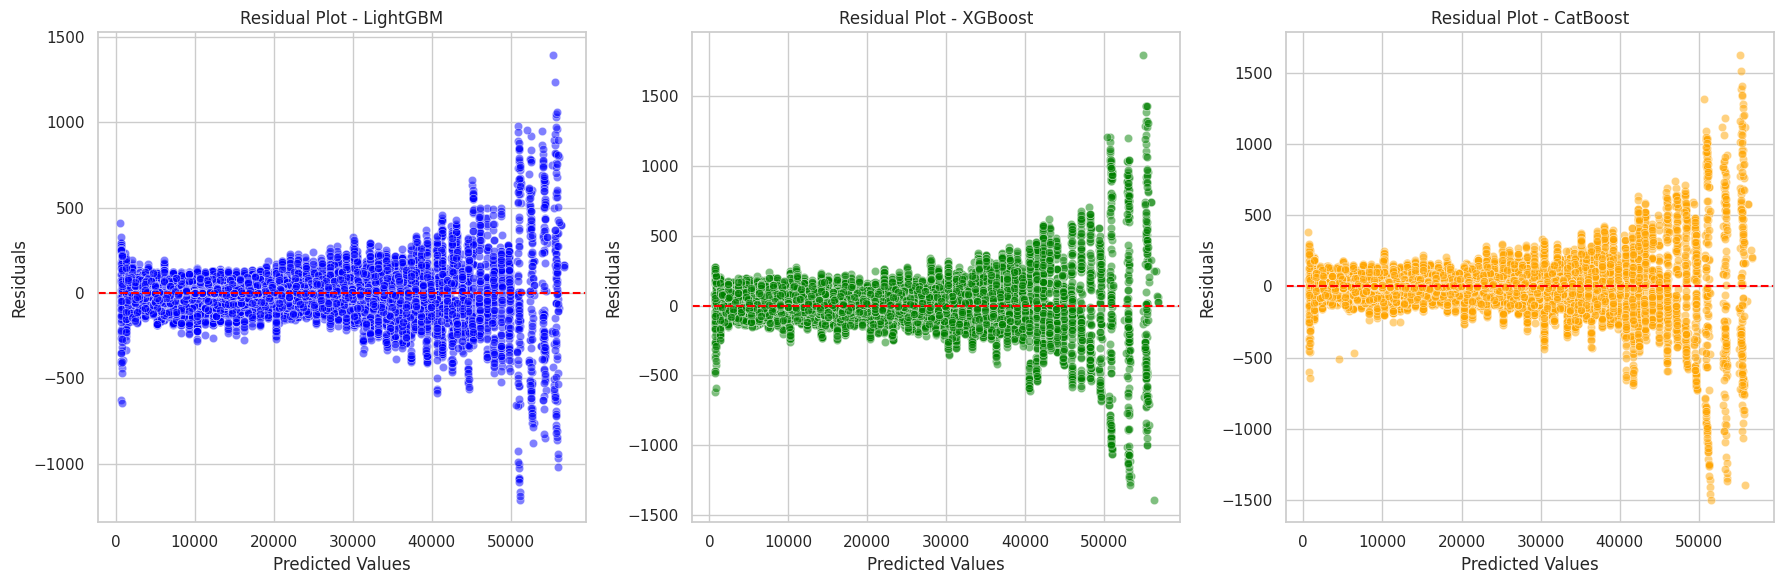

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating the residuals (difference between actual and predicted values)
lgbm_residuals = y_test - lgbm_hp_pred
xgb_residuals = y_test - xgb_hp_pred
cat_residuals = y_test - catboost_hp_pred

# Setting up the figure size
plt.figure(figsize=(18, 6))

# Residual plot for the LightGBM model
plt.subplot(1, 3, 1)  # Change to 1 row, 3 columns, and first subplot
sns.scatterplot(x=lgbm_hp_pred, y=lgbm_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - LightGBM')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residual plot for the XGBoost model
plt.subplot(1, 3, 2)  # Change to the second subplot
sns.scatterplot(x=xgb_hp_pred, y=xgb_residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residual plot for the CatBoost model
plt.subplot(1, 3, 3)  # Change to the third subplot
sns.scatterplot(x=catboost_hp_pred, y=cat_residuals, color='orange', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot - CatBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adjusting the layout for better visualization
plt.tight_layout()

# Displaying the plots
plt.show()

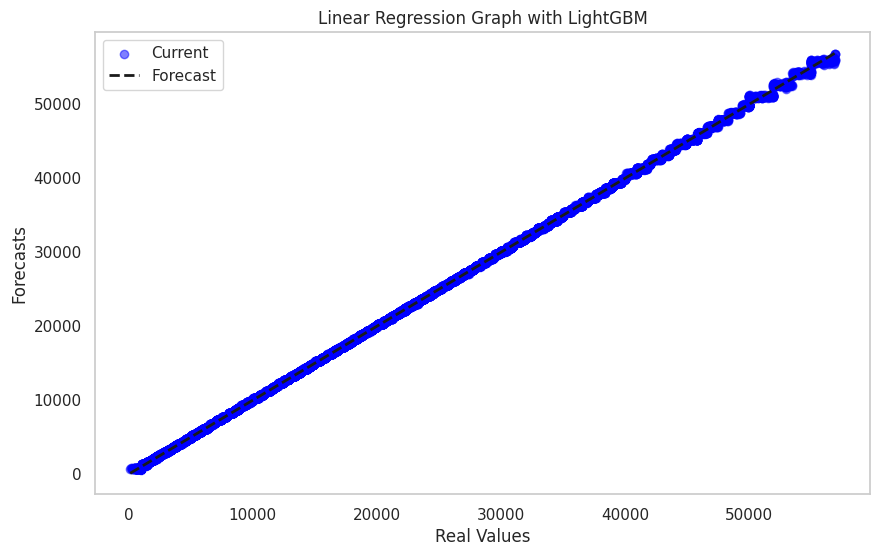

In [163]:
# Plot the linear regression graph LGBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lgbm_hp_pred, color='blue', alpha=0.5) # Scatter plot of actual values ​​vs predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Reference line for perfect regression
plt.legend(["Current", "Forecast"])
plt.xlabel('Real Values')
plt.ylabel('Forecasts')
plt.title('Linear Regression Graph with LightGBM')
plt.grid(False)
plt.show()

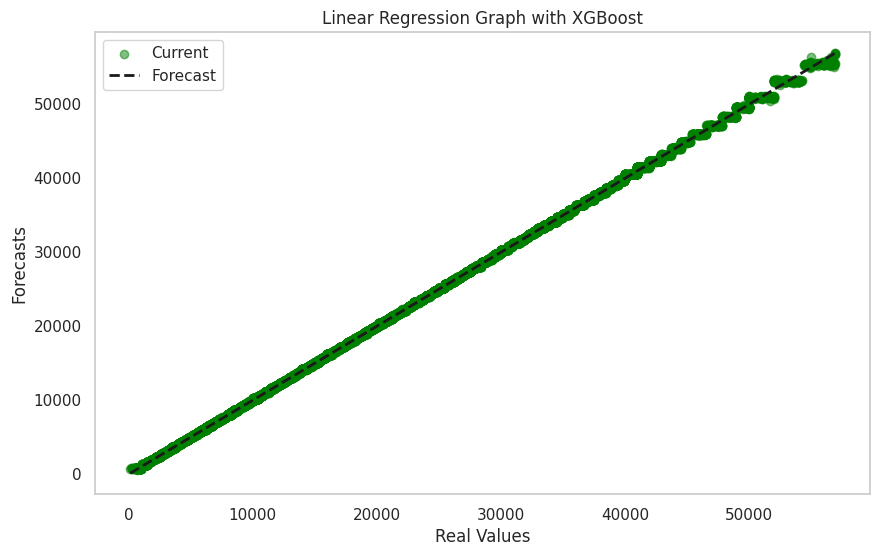

In [164]:
# Plot the linear regression graph XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_hp_pred, color='green', alpha=0.5) # Scatter plot of actual values ​​vs predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Reference line for perfect regression
plt.legend(["Current", "Forecast"])
plt.xlabel('Real Values')
plt.ylabel('Forecasts')
plt.title('Linear Regression Graph with XGBoost')
plt.grid(False)
plt.show()

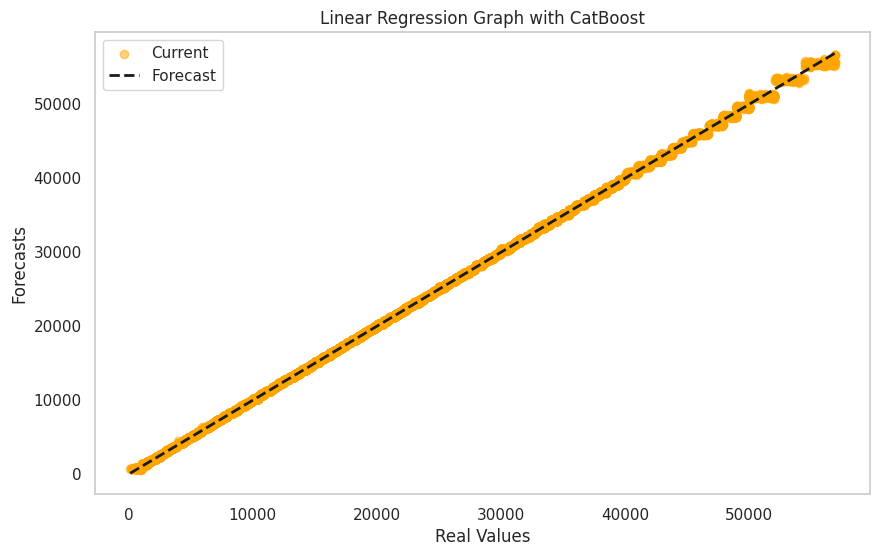

In [165]:
# Plot the linear regression graph CatBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, catboost_hp_pred, color='orange', alpha=0.5) # Scatter plot of actual values ​​vs predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Reference line for perfect regression
plt.legend(["Current", "Forecast"])
plt.xlabel('Real Values')
plt.ylabel('Forecasts')
plt.title('Linear Regression Graph with CatBoost')
plt.grid(False)
plt.show()

### 8 - Important Features

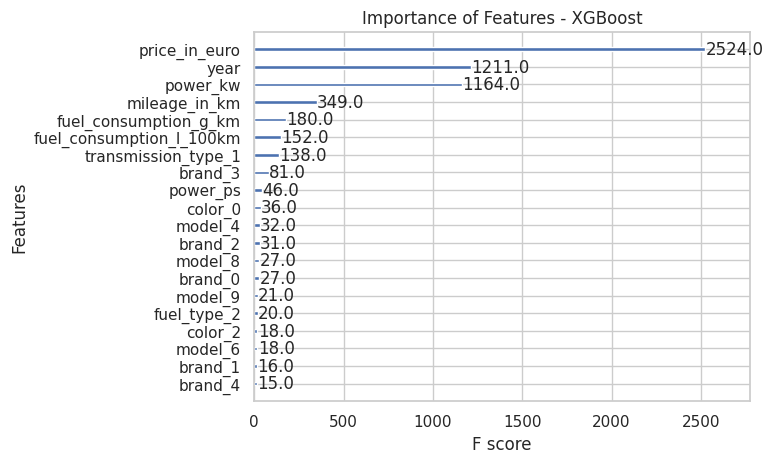

In [167]:
# Plotting Feature Importance for the XGBoost Model
xgb.plot_importance(xgb_model_hp, max_num_features=20, importance_type='weight')
plt.title('Importance of Features - XGBoost')
plt.show()

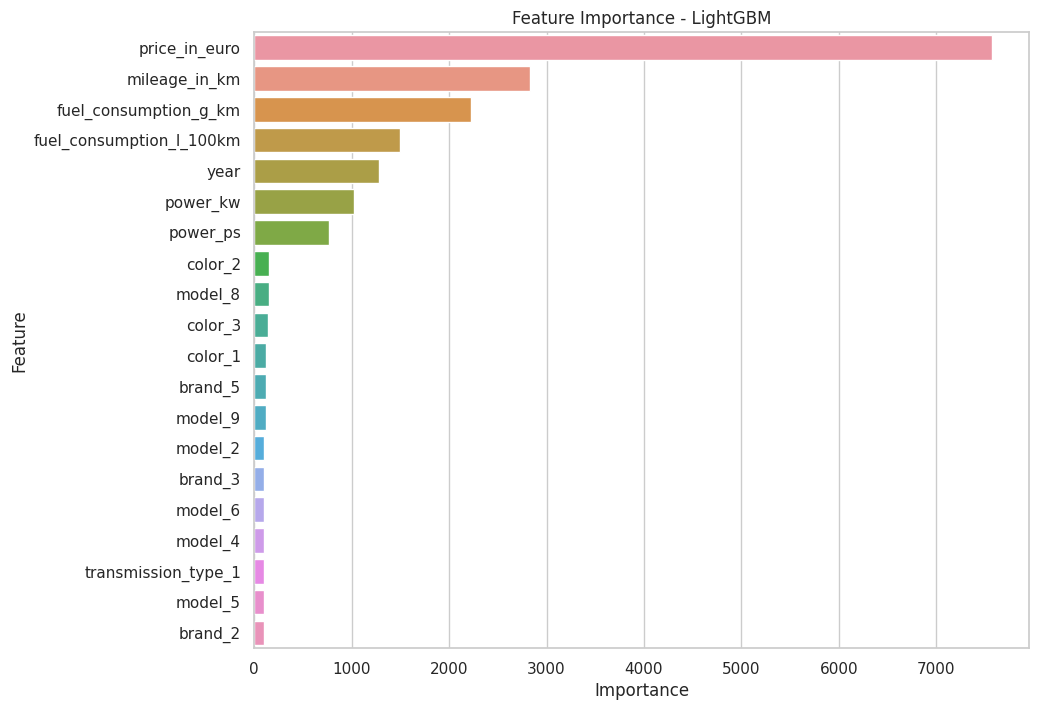

In [166]:
# Importing the feature importances from the LightGBM model into a DataFrame
lgbm_feature_importances = pd.DataFrame({'Feature': X_train.columns,
                                         'Importance': lgbm_model_hp.feature_importances_})

# Sorting the features by their importance in descending order
lgbm_feature_importances = lgbm_feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the top 20 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=lgbm_feature_importances.head(20))
plt.title('Feature Importance - LightGBM')
plt.show()

In [ ]:
# Importing the feature importances from the LightGBM model into a DataFrame
catboost_feature_importances = pd.DataFrame({'Feature': X_train.columns,
                                         'Importance': catboost_model_hp.feature_importances_})

# Sorting the features by their importance in descending order
catboost_feature_importances = catboost_feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the top 20 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=lgbm_feature_importances.head(20))
plt.title('Feature Importance - LightGBM')
plt.show()

### 9 -  Final result

In [162]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculating the metrics for the LightGBM model
lgbm_r2 = r2_score(y_test, lgbm_hp_pred)
lgbm_rmse = sqrt(mean_squared_error(y_test, lgbm_hp_pred))

# Calculating the metrics for the XGBoost model
xgb_r2 = r2_score(y_test, xgb_hp_pred)
xgb_rmse = sqrt(mean_squared_error(y_test, xgb_hp_pred))

# Calculating the metrics for the CatBoost model
cat_r2 = r2_score(y_test, catboost_hp_pred)
cat_rmse = sqrt(mean_squared_error(y_test, catboost_hp_pred))

# Storing the results in a dictionary
results = {"Model": ["LightGBM", "XGBoost", "CatBoost"],
           "R²": [lgbm_r2, xgb_r2, cat_r2],
           "RMSE": [lgbm_rmse, xgb_rmse, cat_rmse]}

# Converting the dictionary into a DataFrame
results_df = pd.DataFrame(results)

# Displaying the DataFrame with the results
results_df

,Model,R²,RMSE
0,LightGBM,0.913304,3308.053676
1,XGBoost,0.916056,3255.130289
2,CatBoost,0.914596,3283.320295


### Analysis:

#### 1. R² (R-squared) Values:

* LightGBM_GPU: 0.913304
* XGBoost_GPU: 0.916056
* CatBoost_GPU: 0.914596

All three models have similar R² values, indicating that they explain about 91% of the variance in the target variable, respectively. This means that the models are capturing a similar amount of the underlying pattern in the data.

#### 2. RMSE (Root Mean Squared Error) Values:

* LightGBM_GPU: 3308.053676
* XGBoost_GPU: 3255.130289
* CatBoost_GPU: 3283.3201

The RMSE values for all three models are also quite close, with XGBoost slightly outperforming CatBoost. RMSE measures the average magnitude of the error between the predicted values and the actual values. Lower RMSE indicates better performance, so XGBoost has a marginally better fit.

#### Conclusion:
All three LightGBM_GPU, XGBoost_GPU and CatBoost perform similarly on this dataset, with LightGBM having a slight edge in both R² and RMSE. The choice between these two models could be based on other factors such as training time, interpretability, or specific use-case requirements, but in terms of pure predictive performance, they are almost equivalent.

In [163]:
model_filename = 'xgb_model.json'  # You can also use .bin for binary format
xgb_model_hp.save_model(model_filename)

# To download the saved model (for example, if you're in a notebook environment like Google Colab)
from IPython.display import FileLink

# This will create a link to download the saved model file
display(FileLink(model_filename))

/kaggle/working/xgb_model.json